In [11]:
# Importar las librerías necesarias
import openai
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Configuración de la API de OpenAI
openai.api_key = 'sk-IhXpoG0QY75Tj8HZwl9ubcW5PvyatjlmfbRXZ28tZuT3BlbkFJ_8mmxbJ0Ti8_F6Q12vbGM_I7-vb7H3RPgnGO6UmpAA'

# Función para interactuar con GPT-4
def generate_report(prompt):
    response = openai.Completion.create(
        engine="text-davinci-003",  # O el modelo más adecuado
        prompt=prompt,
        max_tokens=500
    )
    return response.choices[0].text.strip()

# Función para generar gráficos de predicción de demanda
def plot_demand_forecast(dates, demand):
    plt.figure(figsize=(10, 5))
    plt.plot(dates, demand, marker='o')
    plt.title('Predicción de Demanda')
    plt.xlabel('Fecha')
    plt.ylabel('Demanda')
    plt.grid(True)
    plt.show()


In [13]:
# Ejemplo de datos históricos de inventario
data = {
    'Fecha': ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01'],
    'Producto A': [120, 150, 130, 160],
    'Producto B': [80, 90, 85, 70],
    'Producto C': [50, 60, 55, 65]
}

# Convertir datos a DataFrame
df = pd.DataFrame(data)
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Visualizar los datos
df.set_index('Fecha', inplace=True)
print(df)


            Producto A  Producto B  Producto C
Fecha                                         
2024-01-01         120          80          50
2024-02-01         150          90          60
2024-03-01         130          85          55
2024-04-01         160          70          65


In [31]:
# Crear un prompt básico para generar un informe de inventario
# Definir los datos del inventario
inventario = {
    'Producto A': {'inicial': 120, 'final': 160, 'ventas': 40},
    'Producto B': {'inicial': 80, 'final': 70, 'ventas': 10},
    'Producto C': {'inicial': 50, 'final': 65, 'ventas': 15}
}

# Construir el prompt de manera dinámica
prompt = "Genera un informe detallado de inventario basado en los siguientes datos:\n\n"

for producto, datos in inventario.items():
    prompt += f"{producto}:\n"
    prompt += f"- Inventario inicial: {datos['inicial']}\n"
    prompt += f"- Inventario final: {datos['final']}\n"
    prompt += f"- Ventas durante el periodo: {datos['ventas']}\n\n"

prompt += "El informe debe incluir recomendaciones para cada producto."

# Mostrar el prompt
print(prompt)


Genera un informe detallado de inventario basado en los siguientes datos:

Producto A:
- Inventario inicial: 120
- Inventario final: 160
- Ventas durante el periodo: 40

Producto B:
- Inventario inicial: 80
- Inventario final: 70
- Ventas durante el periodo: 10

Producto C:
- Inventario inicial: 50
- Inventario final: 65
- Ventas durante el periodo: 15

El informe debe incluir recomendaciones para cada producto.


C:\Users\DIAZ - GONZALEZ\AppData\Local\Temp\ipykernel_6184\3424323323.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Fecha': pd.date_range(start='2024-05-01', periods=4, freq='M'),


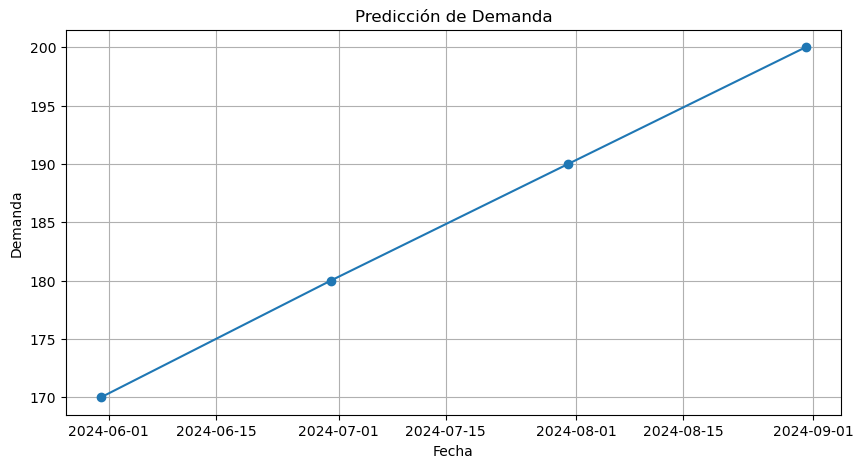

In [33]:
# Simular predicciones de demanda utilizando un modelo básico
# En la práctica, esto se haría con un modelo predictivo real

# Ejemplo de predicción de demanda
demand_prediction = {
    'Fecha': pd.date_range(start='2024-05-01', periods=4, freq='M'),
    'Producto A': [170, 180, 190, 200],
    'Producto B': [65, 60, 55, 50],
    'Producto C': [70, 75, 80, 85]
}

df_prediction = pd.DataFrame(demand_prediction)
df_prediction.set_index('Fecha', inplace=True)

# Graficar la predicción de demanda para un producto
plot_demand_forecast(df_prediction.index, df_prediction['Producto A'])


In [9]:
# Configuración de umbrales de inventario para alertas
thresholds = {
    'Producto A': 150,
    'Producto B': 60,
    'Producto C': 50
}

# Verificar niveles de inventario y generar alertas
for producto in df.columns:
    inventario_actual = df.iloc[-1][producto]
    if inventario_actual < thresholds[producto]:
        print(f"Alerta: {producto} está por debajo del umbral crítico. Inventario actual: {inventario_actual}")
    else:
        print(f"{producto} tiene un inventario suficiente. Inventario actual: {inventario_actual}")


Producto A tiene un inventario suficiente. Inventario actual: 160
Producto B tiene un inventario suficiente. Inventario actual: 70
Producto C tiene un inventario suficiente. Inventario actual: 65
